# 使用完全連接層估算簡單線性迴歸的參數w、b

In [32]:
# 載入套件
import numpy as np 
import torch

## 產生隨機資料

In [33]:
# 產生線性隨機資料100筆，介於 0-50
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 
  
# 資料加一點雜訊(noise)
X += np.random.uniform(-10, 10, n) 
y += np.random.uniform(-10, 10, n) 

## 定義模型

In [34]:
# 定義模型
def create_model(input_feature, output_feature):
    model = torch.nn.Sequential(
        torch.nn.Linear(input_feature, output_feature),
        torch.nn.Flatten(0, -1) # 所有維度轉成一維 
    )
    return model

In [35]:
# 測試扁平層(Flatten)
input = torch.randn(32, 1, 5, 5)
m = torch.nn.Sequential(
    torch.nn.Conv2d(1, 32, 5, 1, 1),
    torch.nn.Flatten()
)
output = m(input)
output.size()

torch.Size([32, 288])

## 定義訓練函數

In [36]:
def train(X, y, epochs=2000, lr=1e-6):
    model = create_model(1, 1)

    # 定義損失函數
    loss_fn = torch.nn.MSELoss(reduction='sum') 

    loss_list, w_list, b_list=[], [], []    
    for epoch in range(epochs):   # 執行訓練週期
        y_pred = model(X)        # 預測值
        
        # 計算損失函數值
        # print(y_pred.shape, y.shape)
        MSE = loss_fn(y_pred, y) 
        
        # 梯度重置：改由model.zero_grad() 取代 w、b 逐一設定。
        model.zero_grad()
        
        # 反向傳導
        MSE.backward()  
        
        # 權重更新：改用 model.parameters 取代 w、b 逐一更新 
        with torch.no_grad():
            for param in model.parameters():
                param -= lr * param.grad
        
        # 記錄訓練結果
        linear_layer = model[0]
        if (epoch+1) % 1000 == 0 or epochs < 1000:
            w_list.append(linear_layer.weight[:, 0].item())  # w.item()：轉成常數
            b_list.append(linear_layer.bias.item())
            loss_list.append(MSE.item())
        
    return w_list, b_list, loss_list

## 執行訓練

In [37]:
# 執行訓練
X2, y2 = torch.FloatTensor(X.reshape(X.shape[0], 1)), torch.FloatTensor(y)
w_list, b_list, loss_list = train(X2, y2)

# 取得 w、b 的最佳解
print(f'w={w_list[-1]}, b={b_list[-1]}')

w=0.902889609336853, b=0.7424326539039612


In [38]:
# 使用不同學習率及更多的執行週期訓練
X2, y2 = torch.FloatTensor(X.reshape(X.shape[0], 1)), torch.FloatTensor(y)
w_list, b_list, loss_list = train(X2, y2, epochs=10**5, lr=1e-5)

# 取得 w、b 的最佳解
print(f'w={w_list[-1]}, b={b_list[-1]}')

w=0.7512918710708618, b=6.102823257446289


In [39]:
# 執行訓練
coef = np.polyfit(X, y, deg=1)

# 取得 w、b 的最佳解
print(f'w={coef[0]}, b={coef[1]}')

w=0.751280589320593, b=6.103222128082408


In [40]:
from sklearn.linear_model import LinearRegression

X2 = X.reshape(X.shape[0], 1)

lr = LinearRegression()
lr.fit(X2, y)

lr.coef_[0], lr.intercept_

(0.7512805893205929, 6.103222128082415)

## 顯示迴歸線

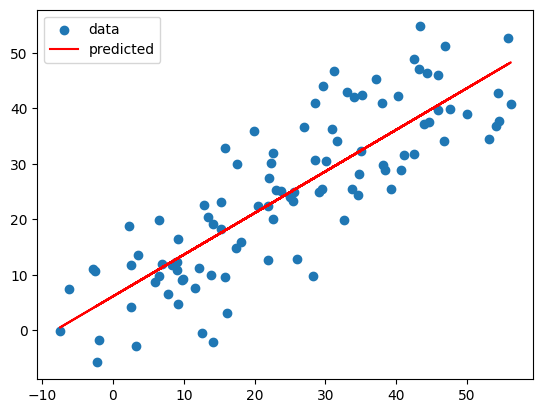

In [41]:
import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, w_list[-1] * X + b_list[-1], 'r-', label='predicted')
plt.legend()

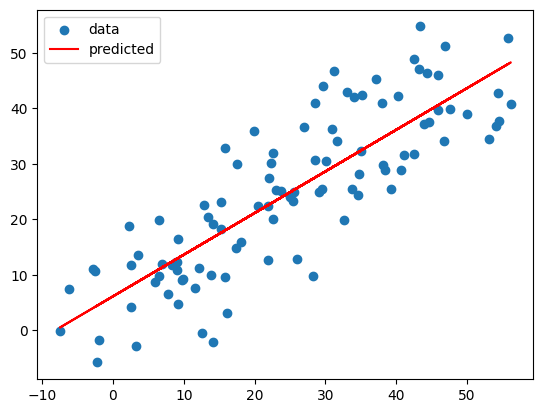

In [42]:
# NumPy 求得的迴歸線
import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, coef[0] * X + coef[1], 'r-', label='predicted')
plt.legend()

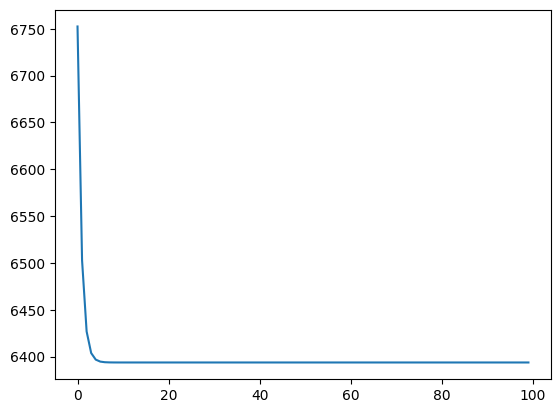

In [43]:
# 損失函數繪圖
plt.plot(loss_list)

In [44]:
loss_list

[6752.4052734375,
 6502.6728515625,
 6426.84521484375,
 6403.8203125,
 6396.82958984375,
 6394.70654296875,
 6394.0625,
 6393.86669921875,
 6393.8076171875,
 6393.78955078125,
 6393.78369140625,
 6393.78271484375,
 6393.78173828125,
 6393.78173828125,
 6393.78125,
 6393.78076171875,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 6393.78125,
 

In [45]:
w_list

[0.8493097424507141,
 0.8052979707717896,
 0.7810460329055786,
 0.7676823139190674,
 0.7603184580802917,
 0.7562608122825623,
 0.754024863243103,
 0.7527927756309509,
 0.752113938331604,
 0.7517398595809937,
 0.7515337467193604,
 0.751420259475708,
 0.7513575553894043,
 0.7513237595558167,
 0.7513055801391602,
 0.7512921094894409,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708618,
 0.7512918710708